# PROJECT  
Code: 10281 
 
Employee Performance Analysis 

INX Future Inc. 


In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [203]:
data = pd.read_excel('E:\data_science\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [204]:
data.iloc[:,9:19].head()

,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction
0,3,4,55,3,2,4,1,No,12,4
1,4,4,42,3,2,1,2,No,12,4
2,4,4,48,2,3,1,5,Yes,21,3
3,4,2,73,2,5,4,3,No,15,2
4,4,1,84,3,2,1,8,No,14,4


In [205]:
data.shape

(1200, 28)

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [207]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [208]:
datacorr = data.corr()
datacorr

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


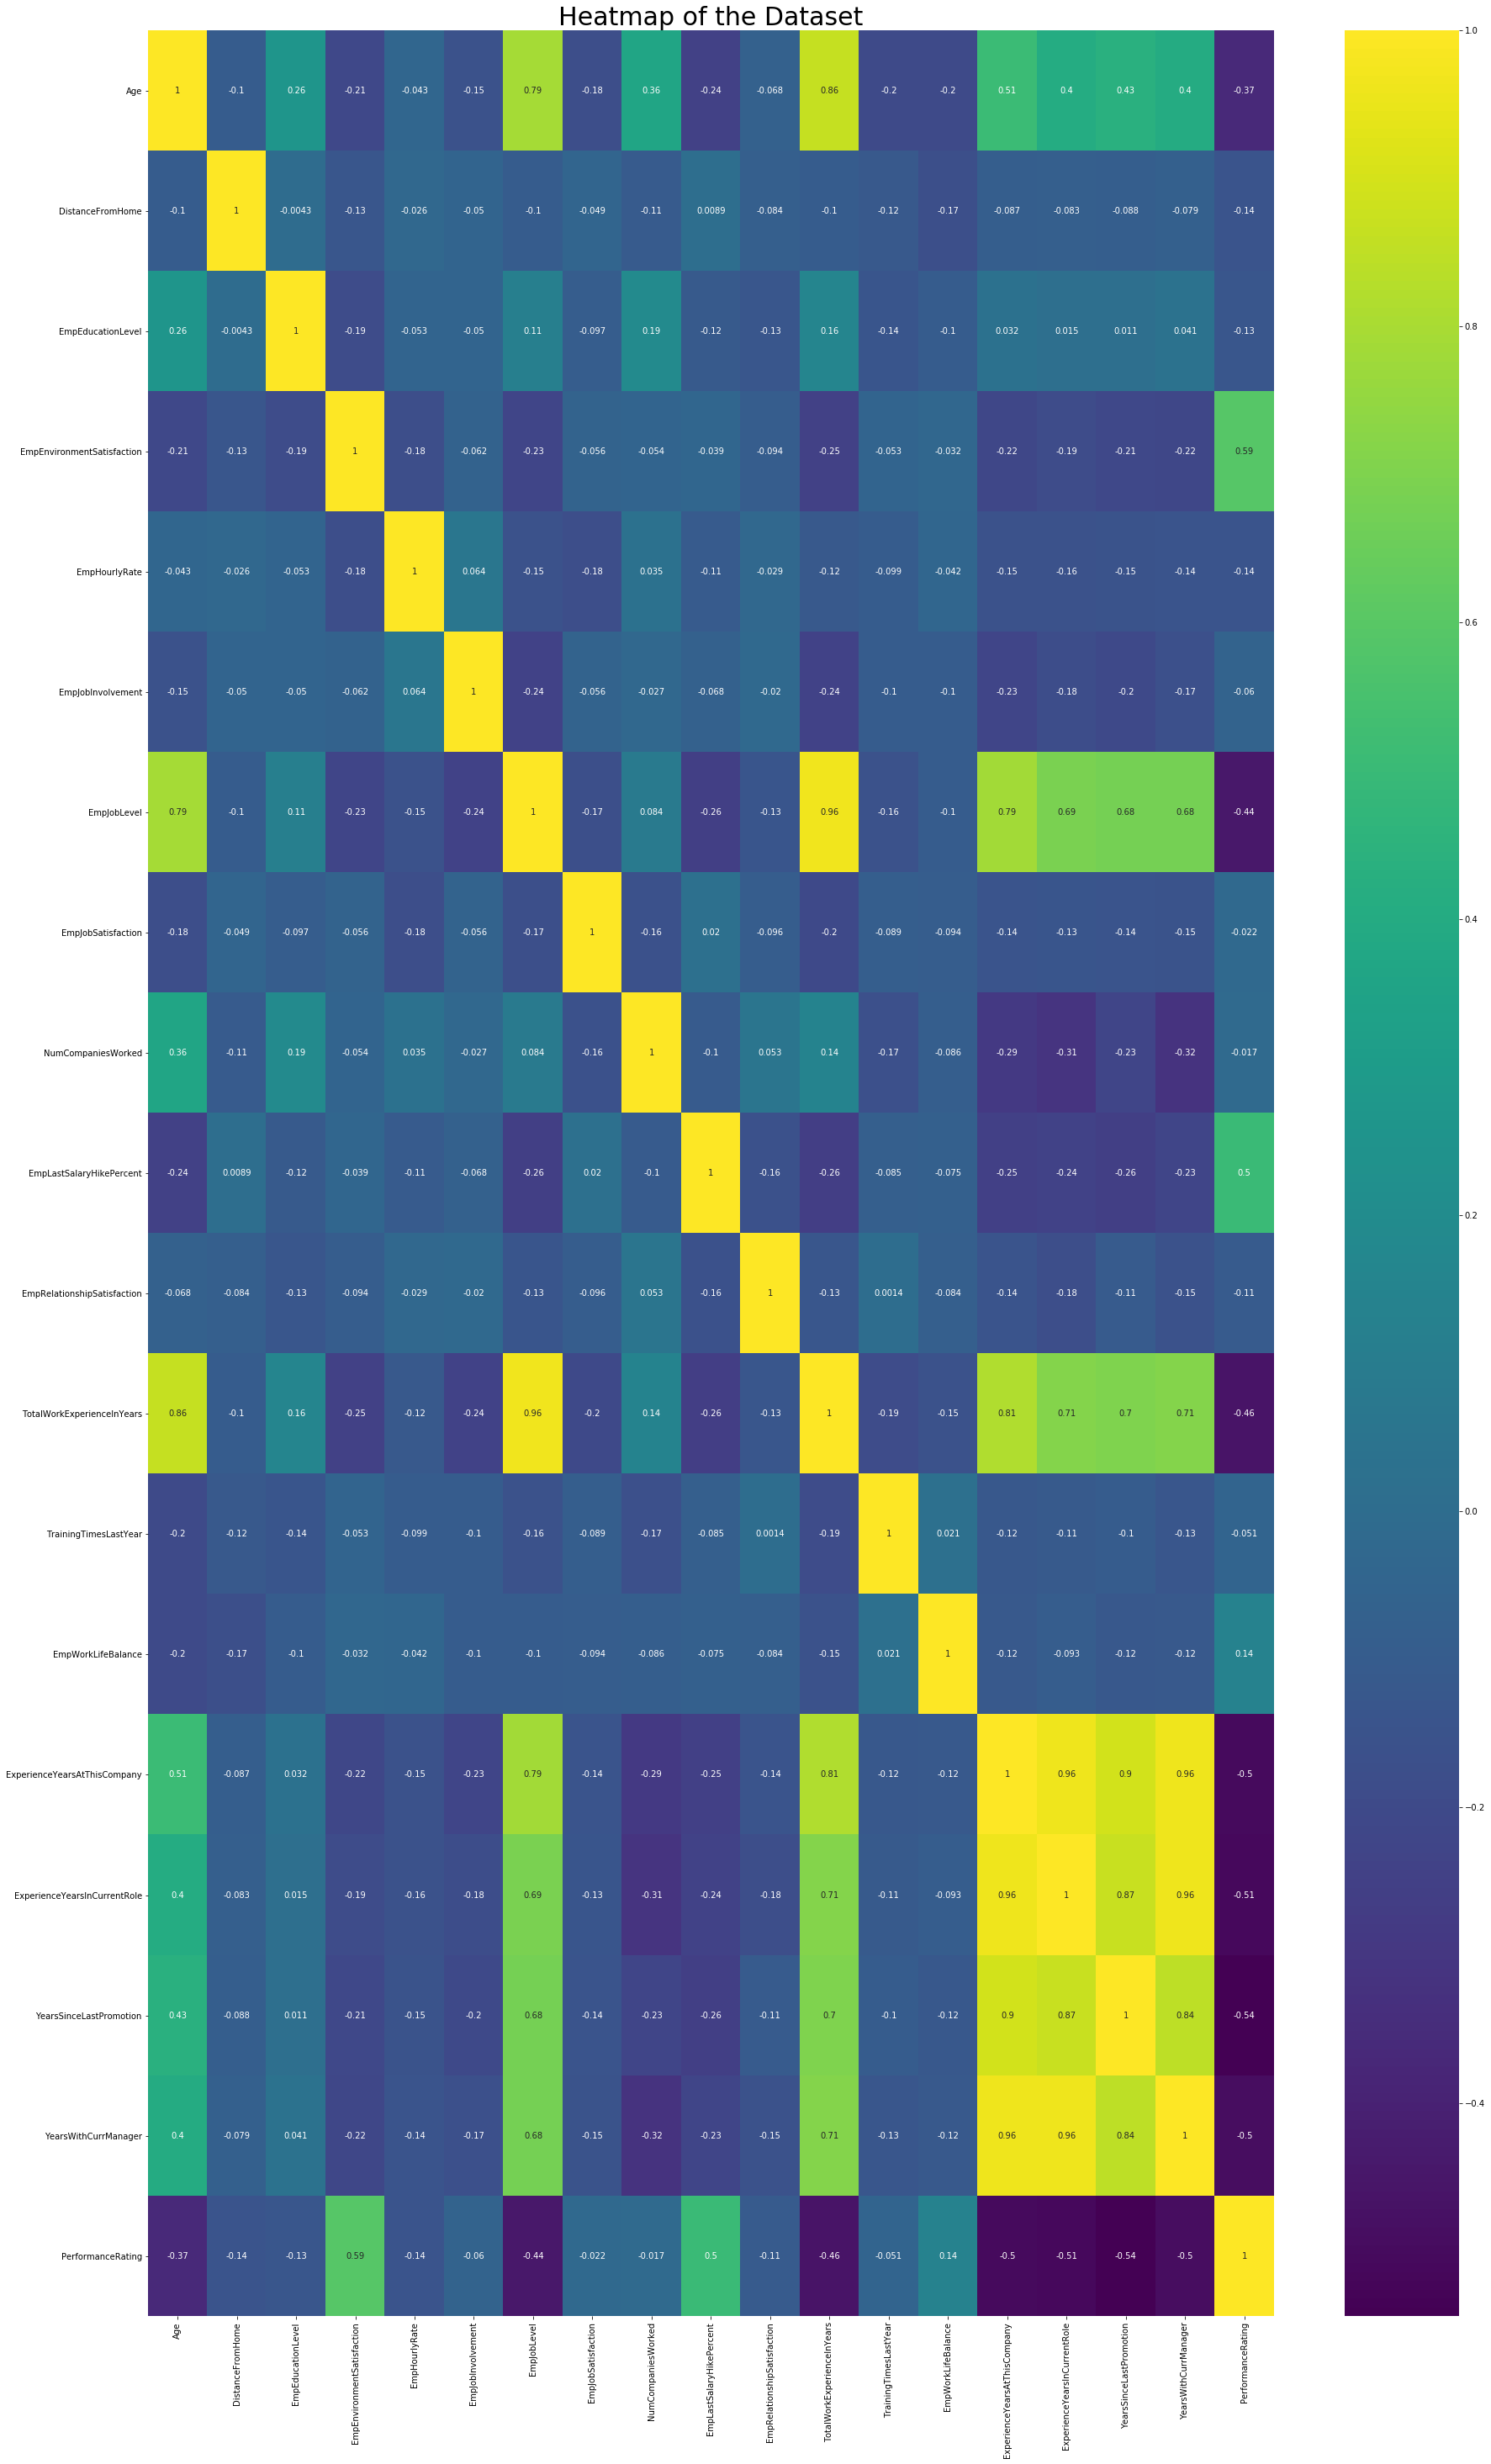

In [209]:
plt.rcParams['figure.figsize'] = (30, 50)
sns.heatmap(datacorr.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

Text(0.5, 1.0, 'Percentage employees age')

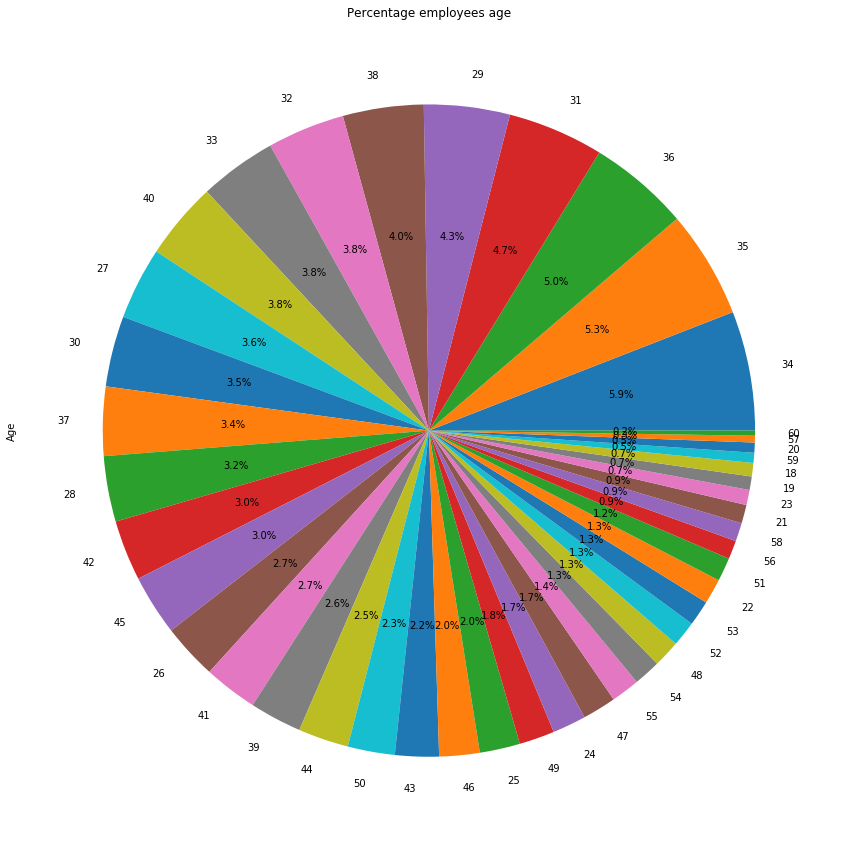

In [210]:
from matplotlib import rcParams
data1 = data['Age'].value_counts(sort = True)
rcParams['figure.figsize'] = 15,15
data1.plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage employees age')


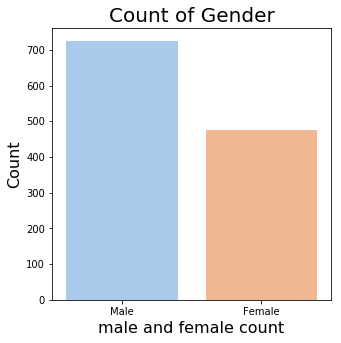

In [211]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Gender', data = data, palette = 'pastel')
ax.set_title(label = 'Count of Gender', fontsize = 20)
ax.set_xlabel(xlabel = 'male and female count', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

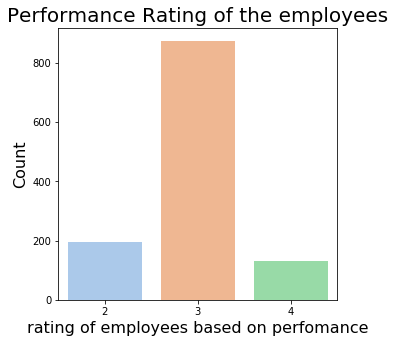

In [212]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'PerformanceRating', data = data, palette = 'pastel')
ax.set_title(label = 'Performance Rating of the employees', fontsize = 20)
ax.set_xlabel(xlabel = 'rating of employees based on perfomance', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

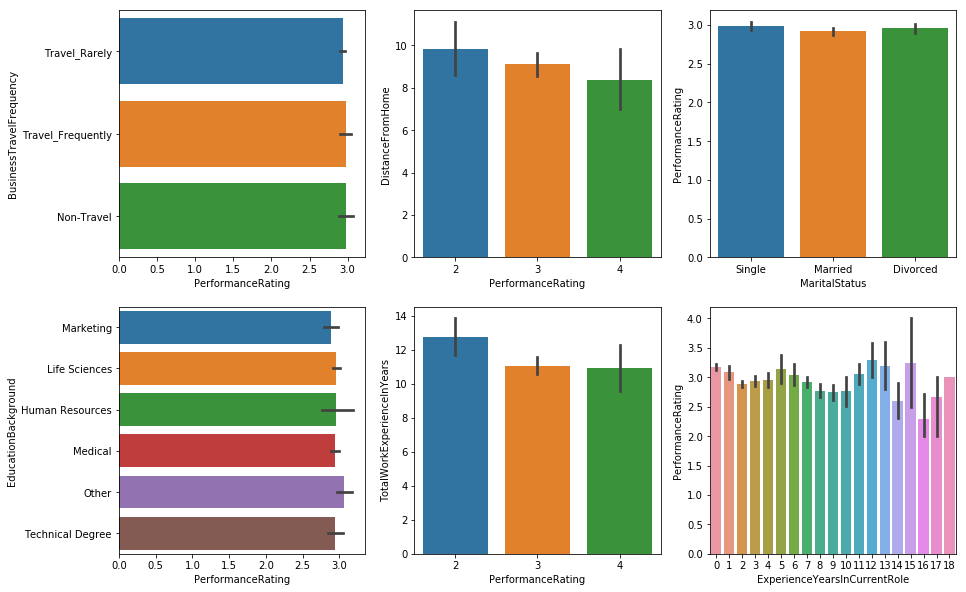

In [213]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(data['PerformanceRating'],data['BusinessTravelFrequency'])
plt.subplot(2,3,2)
sns.barplot(data['PerformanceRating'],data['DistanceFromHome'])
plt.subplot(2,3,3)
sns.barplot(data['MaritalStatus'],data['PerformanceRating'])
plt.subplot(2,3,4)
sns.barplot(data['PerformanceRating'],data['EducationBackground'])
plt.subplot(2,3,5)
sns.barplot(data['PerformanceRating'],data['TotalWorkExperienceInYears'])
plt.subplot(2,3,6)
sns.barplot(data['ExperienceYearsInCurrentRole'],data['PerformanceRating'])
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 <a list of 8 Text yticklabel objects>)

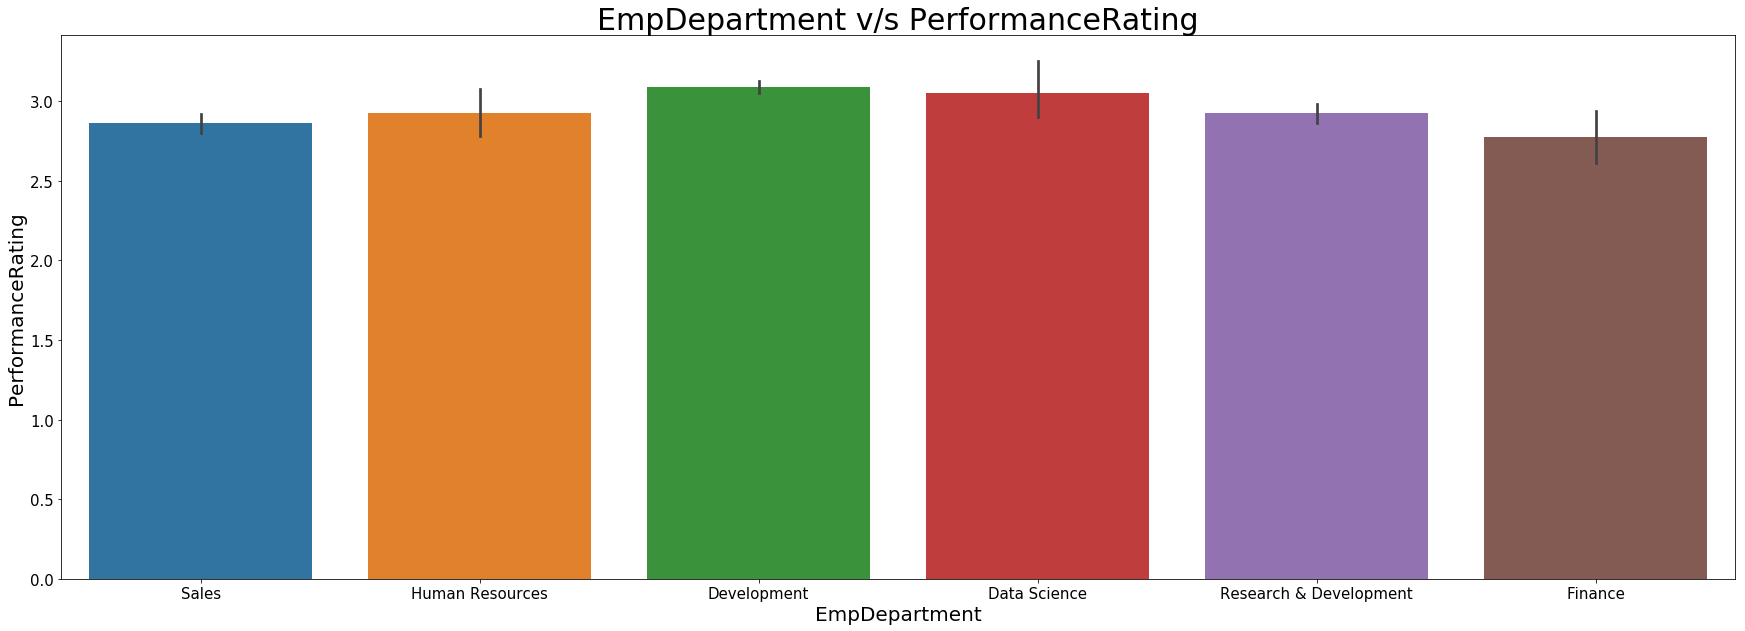

In [214]:
plt.figure(figsize=(30,10))
sns.barplot(x="EmpDepartment", y="PerformanceRating", data=data)
plt.title("EmpDepartment v/s PerformanceRating" , fontsize = 30)
plt.xlabel("EmpDepartment", fontsize = 20)
plt.xticks(size=15)
plt.ylabel("PerformanceRating", fontsize = 20)
plt.yticks(size=15)

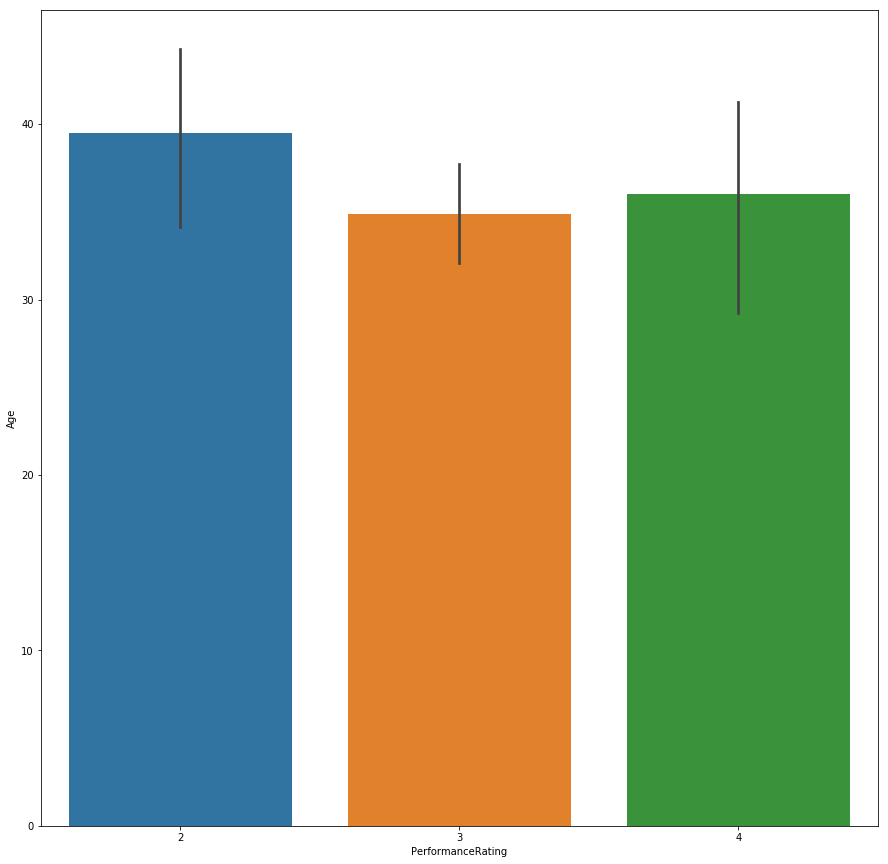

In [215]:
Finance = data[data.EmpDepartment == 'Finance'] 
sns.barplot(Finance['PerformanceRating'], Finance['Age'])

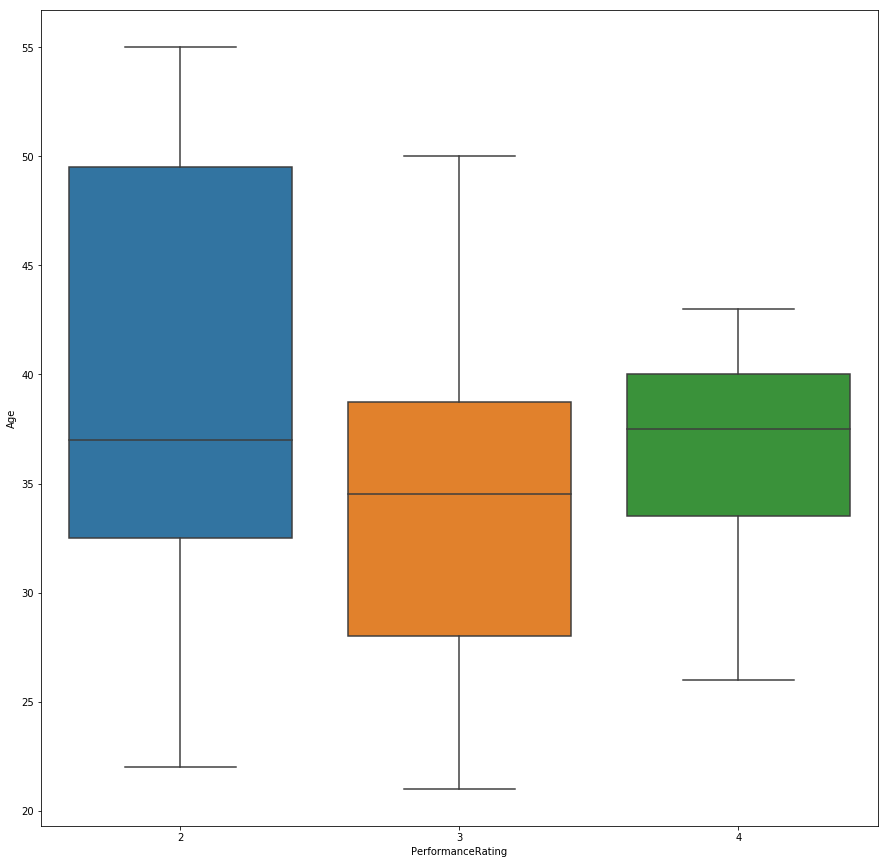

In [216]:
Sales = data[data.EmpDepartment == 'Sales'] 
sns.boxplot(Finance['PerformanceRating'], Finance['Age'])

In [217]:
data.iloc[:,9:19].head()

,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction
0,3,4,55,3,2,4,1,No,12,4
1,4,4,42,3,2,1,2,No,12,4
2,4,4,48,2,3,1,5,Yes,21,3
3,4,2,73,2,5,4,3,No,15,2
4,4,1,84,3,2,1,8,No,14,4


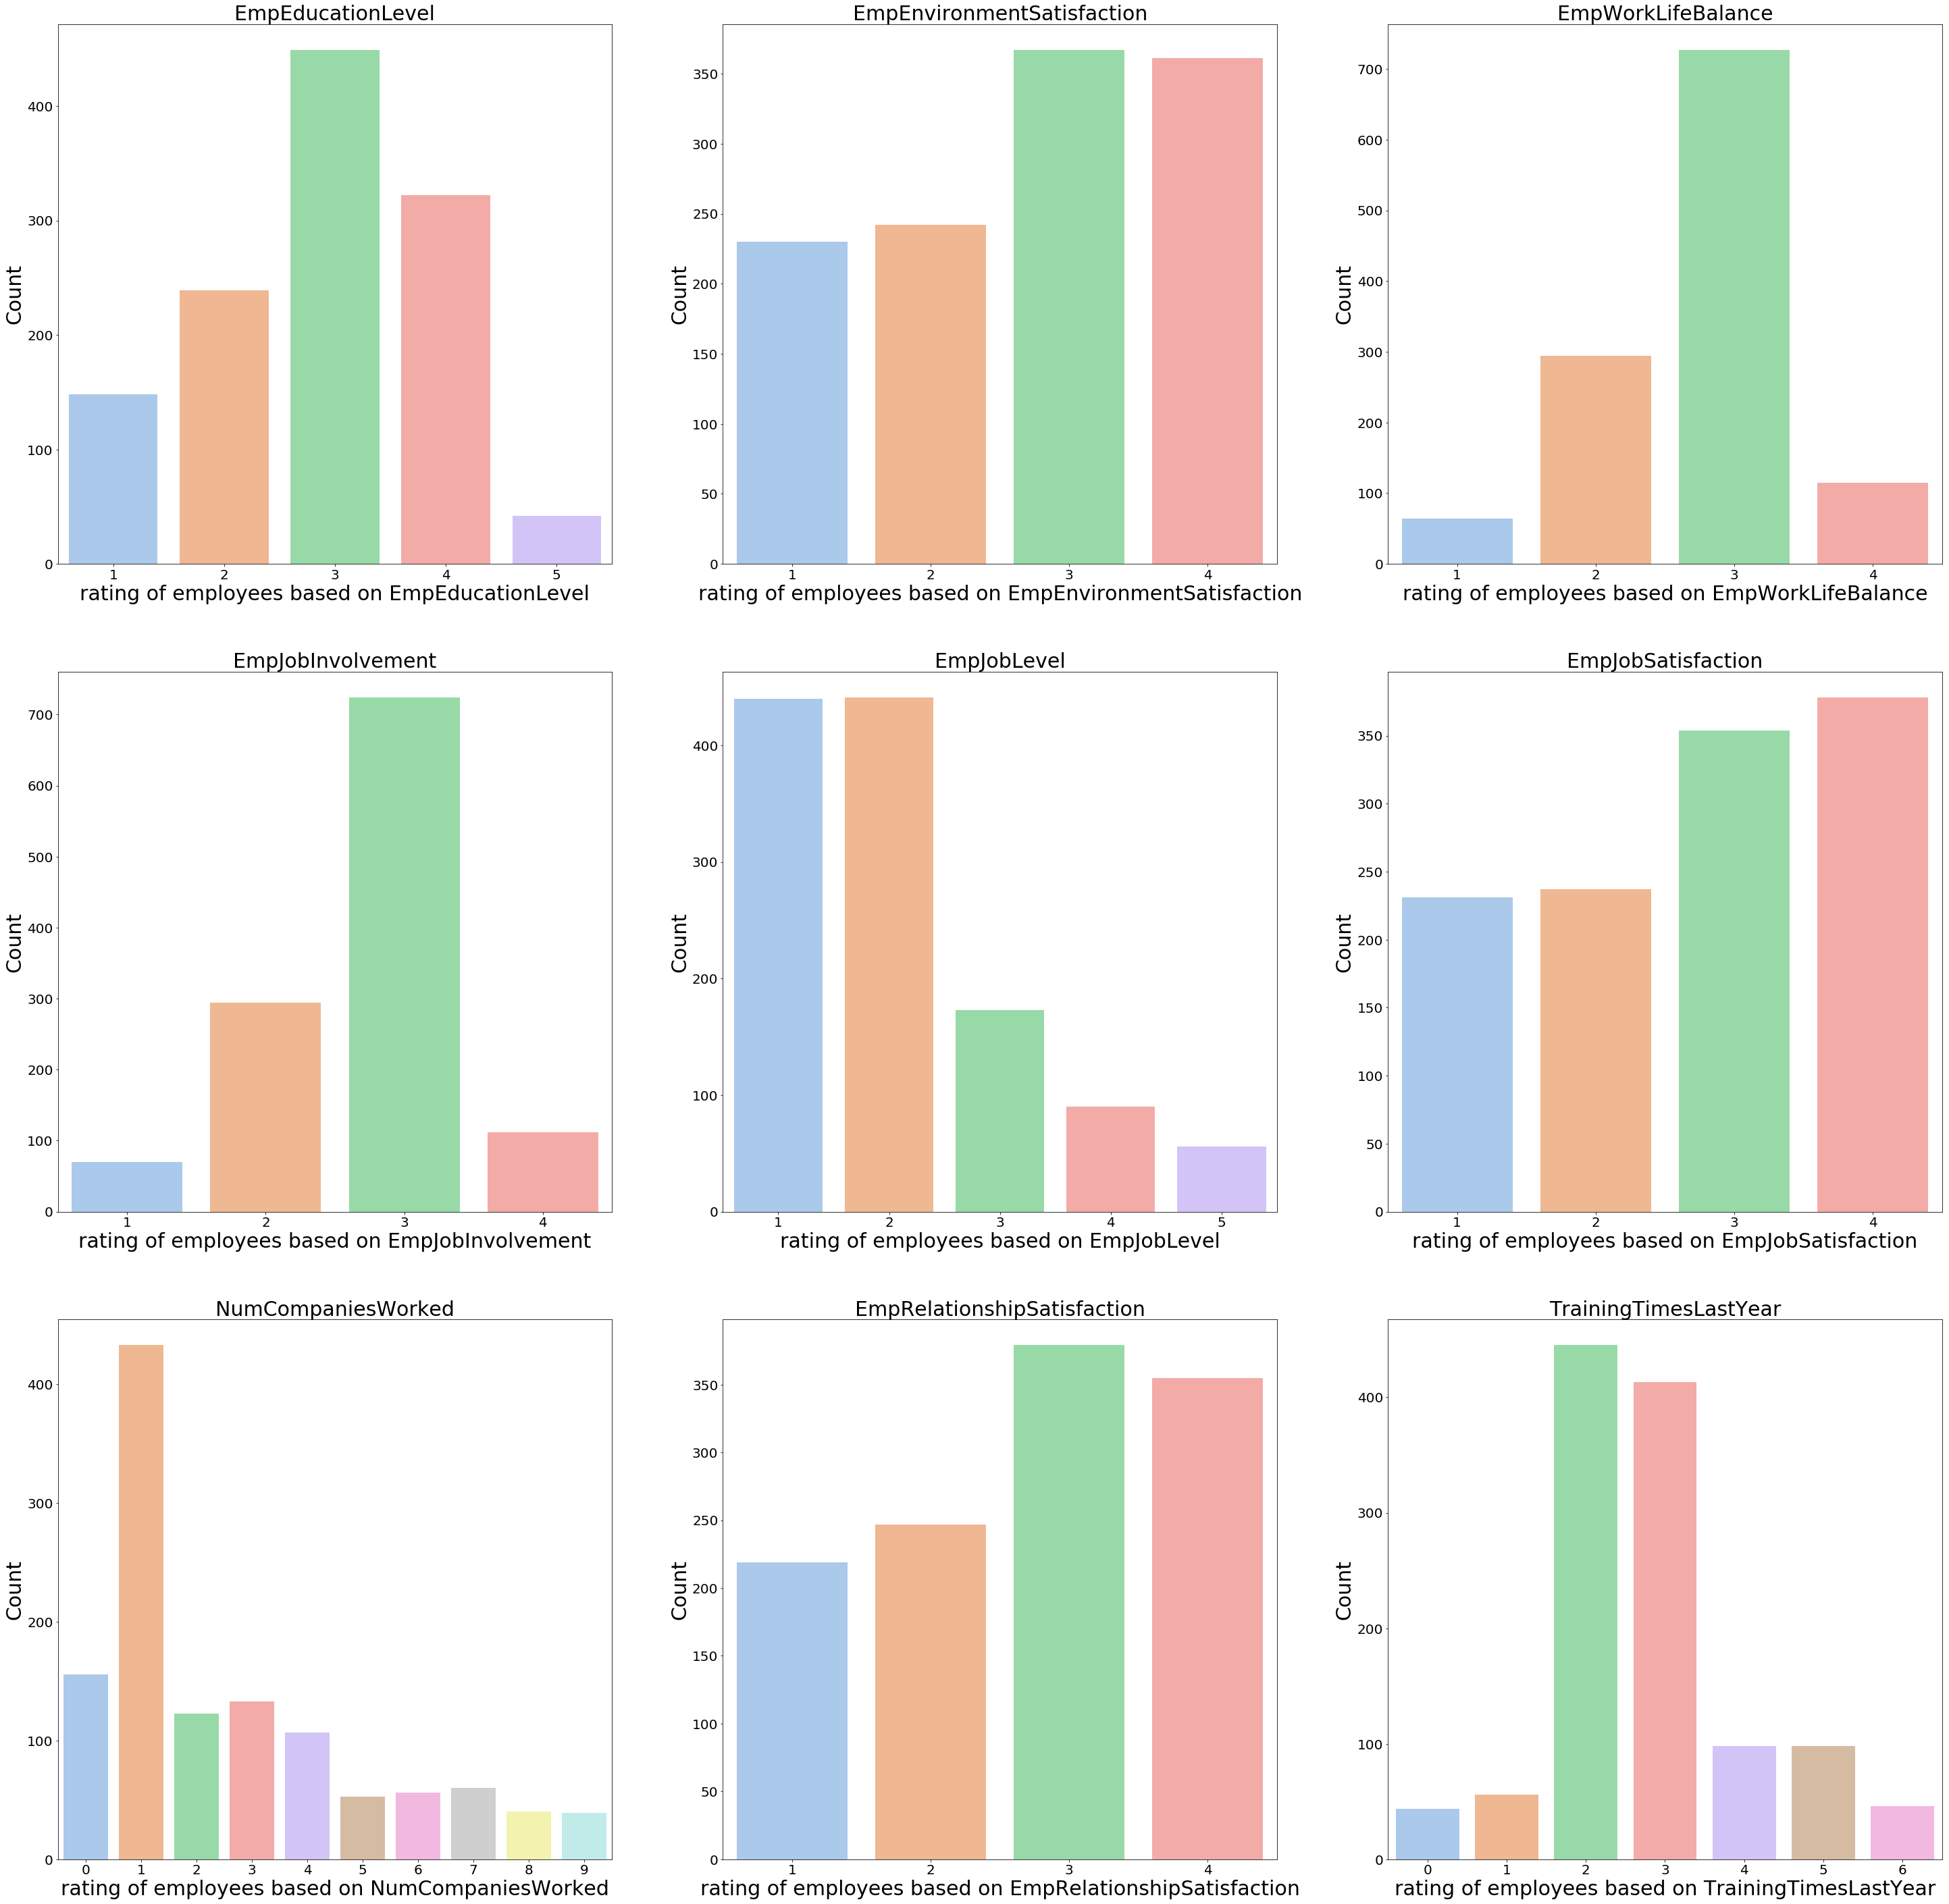

In [218]:
plt.figure(figsize = (50,50))
plt.subplot(3,3,1)
ax = sns.countplot(x = 'EmpEducationLevel', data = data, palette = 'pastel')
ax.set_title(label = 'EmpEducationLevel',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on EmpEducationLevel',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,2)
ax = sns.countplot(x = 'EmpEnvironmentSatisfaction', data = data, palette = 'pastel')
ax.set_title(label = 'EmpEnvironmentSatisfaction',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on EmpEnvironmentSatisfaction',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,3)
ax = sns.countplot(x = 'EmpWorkLifeBalance', data = data, palette = 'pastel')
ax.set_title(label = 'EmpWorkLifeBalance',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on EmpWorkLifeBalance',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,4)
ax = sns.countplot(x = 'EmpJobInvolvement', data = data, palette = 'pastel')
ax.set_title(label = 'EmpJobInvolvement',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on EmpJobInvolvement',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,5)
ax = sns.countplot(x = 'EmpJobLevel', data = data, palette = 'pastel')
ax.set_title(label = 'EmpJobLevel',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on EmpJobLevel',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,6)
ax = sns.countplot(x = 'EmpJobSatisfaction', data = data, palette = 'pastel')
ax.set_title(label = 'EmpJobSatisfaction',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on EmpJobSatisfaction',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,7)
ax = sns.countplot(x = 'NumCompaniesWorked', data = data, palette = 'pastel')
ax.set_title(label = 'NumCompaniesWorked',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on NumCompaniesWorked',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,8)
ax = sns.countplot(x = 'EmpRelationshipSatisfaction', data = data, palette = 'pastel')
ax.set_title(label = 'EmpRelationshipSatisfaction',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on EmpRelationshipSatisfaction',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.subplot(3,3,9)
ax = sns.countplot(x = 'TrainingTimesLastYear', data = data, palette = 'pastel')
ax.set_title(label = 'TrainingTimesLastYear',fontsize = 30)
ax.set_xlabel(xlabel = 'rating of employees based on TrainingTimesLastYear',fontsize = 30)
ax.set_ylabel(ylabel = 'Count',fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


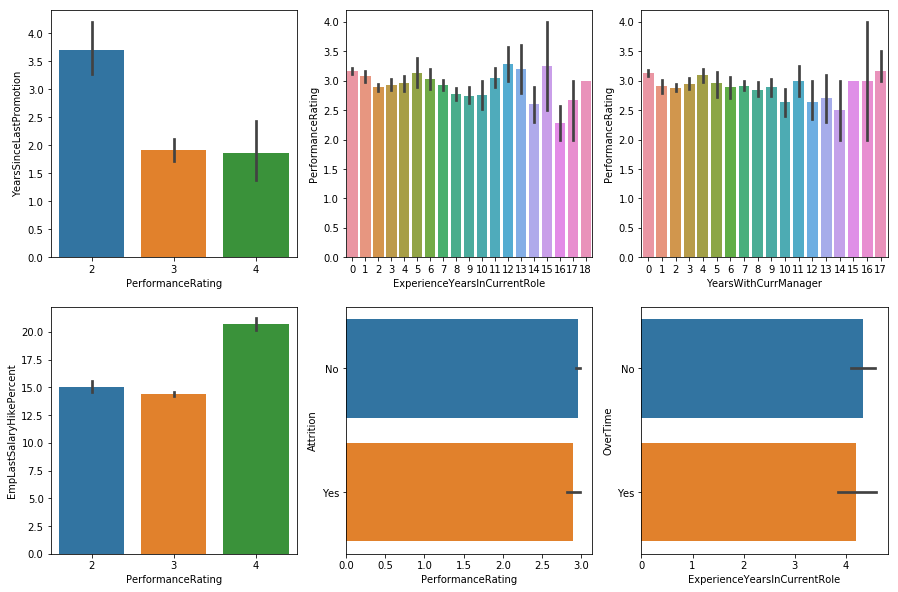

In [219]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(data['PerformanceRating'],data['YearsSinceLastPromotion'])
plt.subplot(2,3,2)
sns.barplot(data['ExperienceYearsInCurrentRole'],data['PerformanceRating'])
plt.subplot(2,3,3)
sns.barplot(data['YearsWithCurrManager'],data['PerformanceRating'])
plt.subplot(2,3,4)
sns.barplot(data['PerformanceRating'],data['EmpLastSalaryHikePercent'])
plt.subplot(2,3,5)
sns.barplot(data['PerformanceRating'],data['Attrition'])
plt.subplot(2,3,6)
sns.barplot(data['ExperienceYearsInCurrentRole'],data['OverTime'])
plt.show()


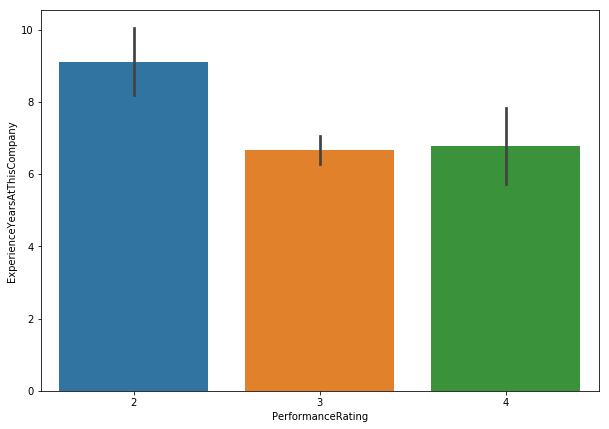

In [220]:
plt.figure(figsize=(10,7))
sns.barplot(data['PerformanceRating'],data['ExperienceYearsAtThisCompany'])

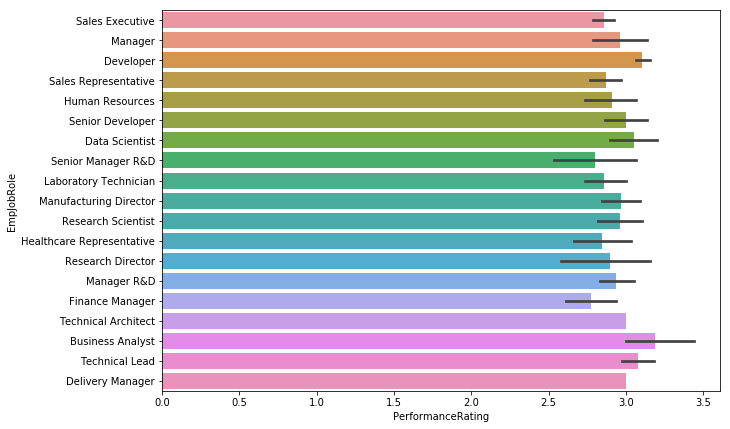

In [221]:
plt.figure(figsize=(10,7))
sns.barplot(data['PerformanceRating'],data['EmpJobRole'])

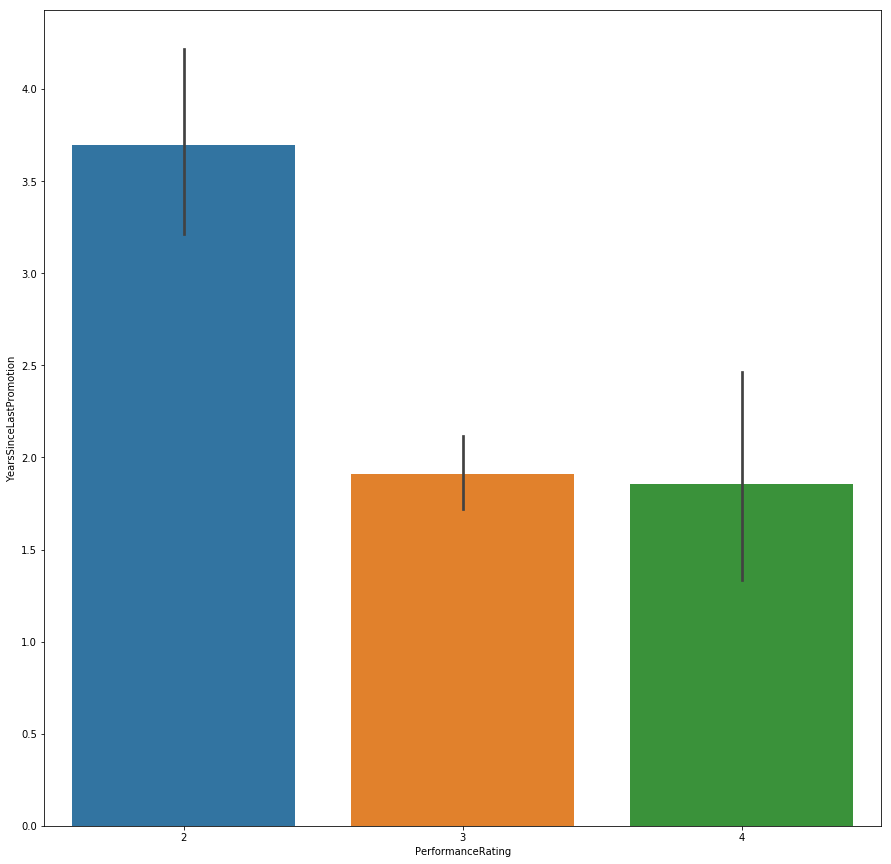

In [222]:
sns.barplot(data['PerformanceRating'],data['YearsSinceLastPromotion'])

# Modelling

In [223]:
data.drop(['EmpNumber'],inplace=True,axis=1)


In [224]:
print(data.head(2))


   Age Gender EducationBackground MaritalStatus EmpDepartment  \
0   32   Male           Marketing        Single         Sales   
1   47   Male           Marketing        Single         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   

  ExperienceYears

In [225]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.Gender = enc.fit_transform(data.Gender)
data.EducationBackground = enc.fit_transform(data.EducationBackground)
data.MaritalStatus= enc.fit_transform(data.MaritalStatus)
data.EmpDepartment = enc.fit_transform(data.EmpDepartment)
data.EmpJobRole = enc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency = enc.fit_transform(data.BusinessTravelFrequency)
data.Attrition = enc.fit_transform(data.Attrition)
data.OverTime = enc.fit_transform(data.OverTime)
print(data.head(3))

   Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2         

In [226]:
X=data.iloc[:,:-1]
y=data.PerformanceRating 
print(X.head(3))

   Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   

   EmpEnvironmentSatisfaction  ...  EmpLastSalaryHikePercent  \
0                           4  ...                        12   
1                           4  ...                        12   
2                           4  ...                        21   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                        

# LogisticRegression

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from collections import Counter

In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [229]:
X_train.shape

(840, 26)

In [230]:
X_test.shape

(360, 26)

In [231]:
model = LogisticRegression()

In [232]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7944444444444444

In [233]:
y_test

123     3
1036    3
1034    3
426     2
726     3
       ..
805     3
968     3
411     2
10      3
276     3
Name: PerformanceRating, Length: 360, dtype: int64

In [234]:
y_predict

array([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 4, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 2, 4, 4, 2, 3, 4, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3,
       4, 2, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3,
       3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,

In [235]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 264, 2: 63, 4: 33})


col_0,2,3,4
PerformanceRating,,,
2,32,31,0
3,12,239,13
4,2,16,15


# Testing the results

In [236]:
y_predic=model.predict(X_train)
accuracy_score(y_train,y_predic)

0.8154761904761905

In [237]:
var = np.array(X_test.iloc[10]).reshape((1,-1))

print(var)

[[35  0  1  0  1  3  1 25  4  4 96  3  1  2  1  1 19  1 10  3  2 10  2  7
   8  1]]


In [238]:
model.predict(var)

array([3], dtype=int64)

In [239]:
y_test.iloc[10]

3

# Principal Component Analysis

In [240]:
from sklearn.decomposition import PCA

In [241]:
pca = PCA()
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,11.188553,-1.868985,1.137919,-6.353512,-3.956290,0.903874,-3.150178,-3.947454,-1.221257,-0.484903,...,-2.017612,-0.821853,-0.754060,0.867019,-0.269909,-0.117009,0.224560,-0.522948,-0.237706,0.010890
1,23.392424,13.510207,4.467613,4.195073,-4.270998,-1.112605,-3.425292,-2.865558,-1.779892,-3.253478,...,-0.900316,-1.556409,-0.999426,0.193489,-0.498257,0.664801,-0.734455,-0.574310,-0.244272,0.030089
2,17.706352,14.356292,-4.077411,-10.023784,-4.240676,-0.150191,5.975966,-4.652905,-5.201292,1.676610,...,-0.167101,-1.133484,-0.192155,-0.585232,0.679133,0.232189,0.052480,-0.206872,0.774840,-0.305187
3,-7.425834,16.645927,0.426633,-10.206795,1.194170,-1.503718,-0.311969,6.357205,4.229555,2.686273,...,0.921956,-0.363222,0.894745,0.264092,0.841621,-1.504638,0.608552,-0.498688,-0.243839,-0.051980
4,-18.927334,11.454370,5.921894,18.963664,-5.711562,7.535465,-1.052304,1.937598,-2.755739,2.058424,...,0.131452,-0.233159,-0.738154,-0.205731,-0.724082,-0.360676,0.030976,-0.505234,-0.239898,-0.245851


In [242]:
pca.explained_variance_ratio_

array([5.45354357e-01, 1.89515686e-01, 8.90929725e-02, 6.49531106e-02,
       3.14887859e-02, 1.98866425e-02, 1.74830085e-02, 8.12563459e-03,
       7.28277182e-03, 5.39917551e-03, 4.57153128e-03, 2.52983076e-03,
       2.33849449e-03, 2.06163108e-03, 1.59618405e-03, 1.55940158e-03,
       1.51036851e-03, 1.34322072e-03, 7.17960957e-04, 6.62954605e-04,
       6.42888815e-04, 6.02219234e-04, 5.57895092e-04, 3.16476865e-04,
       2.84510974e-04, 1.22286000e-04])

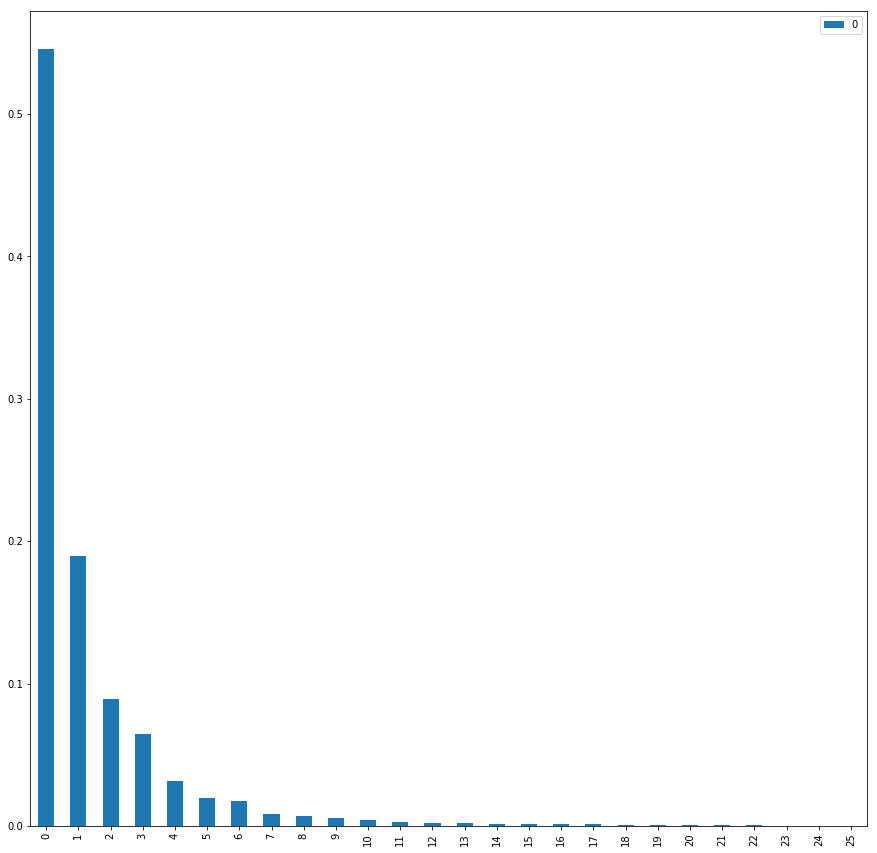

In [243]:
var = pd.DataFrame(pca.explained_variance_ratio_)
var.plot(kind='bar')

In [244]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,random_state=10)
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.83

In [245]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 219, 2: 54, 4: 27})


col_0,2,3,4
PerformanceRating,,,
2,27,26,1
3,10,203,6
4,2,6,19


In [246]:
from sklearn.metrics import precision_score , recall_score ,classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.69      0.50      0.58        54
           3       0.86      0.93      0.89       219
           4       0.73      0.70      0.72        27

    accuracy                           0.83       300
   macro avg       0.76      0.71      0.73       300
weighted avg       0.82      0.83      0.82       300



# RandomForestClassifier

In [247]:
from sklearn.ensemble import RandomForestClassifier  

In [248]:
model=RandomForestClassifier(n_estimators=100,random_state=13)


In [249]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8233333333333334

In [250]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 219, 2: 54, 4: 27})


col_0,2,3,4
PerformanceRating,,,
2,16,34,4
3,4,209,6
4,0,5,22


In [251]:
model.score(X_train,y_train)

1.0

In [252]:
model.score(X_test,y_test)

0.8233333333333334

# GridSearchCV

In [253]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

parameters = {'max_depth':[5,10,15,20,30],
             'random_state':[7,8,9,10,11,12,13],
             'n_estimators':[10,30,50,70,100,150]
             }
grid = GridSearchCV(model,parameters,cv=5,verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:  6.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'n_estimators': [10, 30, 50, 70, 100, 150],
                         'random_state': [7, 8, 9, 10, 11, 12, 13]},
             verbose=1)

In [254]:
grid.best_score_

0.8316666666666667

In [255]:
grid.best_params_

{'max_depth': 15, 'n_estimators': 150, 'random_state': 11}

# Support Vector Machine

In [256]:
from sklearn.svm import SVC

In [257]:
model=SVC(C=5,gamma=0.5,kernel='rbf')# C range 0.1 to 1000 , gamma range 0.01 to 10


In [258]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.73

In [259]:
print(Counter(y_test))
print(classification_report(y_test,y_predict))

Counter({3: 219, 2: 54, 4: 27})
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        54
           3       0.73      1.00      0.84       219
           4       0.00      0.00      0.00        27

    accuracy                           0.73       300
   macro avg       0.24      0.33      0.28       300
weighted avg       0.53      0.73      0.62       300



# XGBoost

In [260]:
from xgboost import XGBClassifier

In [261]:
model=XGBClassifier(learning_rate=0.7,n_estimators=250,random_state=17)

In [262]:
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8633333333333333

In [263]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,28,22,4
3,6,208,5
4,2,2,23


In [264]:
print(Counter(y_test))
print(classification_report(y_test,y_predict))

Counter({3: 219, 2: 54, 4: 27})
              precision    recall  f1-score   support

           2       0.78      0.52      0.62        54
           3       0.90      0.95      0.92       219
           4       0.72      0.85      0.78        27

    accuracy                           0.86       300
   macro avg       0.80      0.77      0.77       300
weighted avg       0.86      0.86      0.86       300

